## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]
clean_df = clean_df.sort_values(by=["Drug Regimen", "Timepoint"], ascending=True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
20,x401,Capomulin,Female,16,15,0,45.000000,0
30,m601,Capomulin,Male,22,17,0,45.000000,0
60,f966,Capomulin,Male,16,17,0,45.000000,0
95,u364,Capomulin,Male,18,17,0,45.000000,0
...,...,...,...,...,...,...,...,...
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [6]:
# Validating there are no longer any duplicates in our clean_df
check_df = clean_df[clean_df.duplicated(["Mouse ID", "Timepoint"])]
check_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_DrugRegimen = clean_df.groupby(["Drug Regimen"])

mean = groupby_DrugRegimen["Tumor Volume (mm3)"].mean()
#print(mean)
median = groupby_DrugRegimen["Tumor Volume (mm3)"].median()
#print(median)
variance = groupby_DrugRegimen["Tumor Volume (mm3)"].var()
#print(variance)
standard_deviation = groupby_DrugRegimen["Tumor Volume (mm3)"].std()
#print(standard_deviation)
sem = groupby_DrugRegimen["Tumor Volume (mm3)"].sem()
#print(sem)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Summary_stats_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "Standard Error of the Mean": sem
})

Summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = groupby_DrugRegimen.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

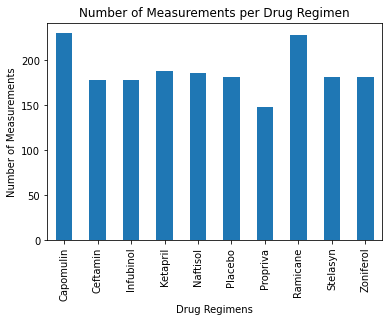

In [10]:
#Utilizing the groupby_DrugRegimen dataframe created earlier to get the count of "Mouse ID" for each Drug Regimen.
Num_Measurements = groupby_DrugRegimen["Mouse ID"].count()


# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

Num_Measurements.plot(kind="bar")

#Setting title name and x and y labels.
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")

plt.show()

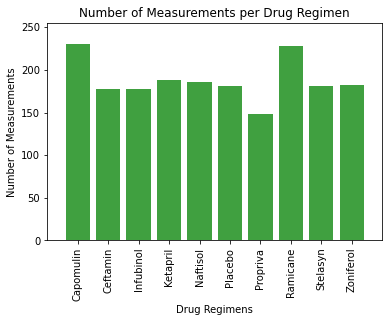

In [11]:
#Setting each unique Drug Regimen to x_axis.
x_axis = clean_df["Drug Regimen"].unique()
#Utilizing the groupby_DrugRegimen dataframe created earlier to get the count of "Mouse ID" for each Drug Regimen.
y_axis = groupby_DrugRegimen["Mouse ID"].count()


# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(x_axis, y_axis, color='g', alpha=0.75, align="center")

#Determining to display all values in our x_axis variable
tick_locations = [value for value in x_axis]
#rotation=90 prints the values from x_axis vertically to remove clutter.
plt.xticks(tick_locations, x_axis, rotation=90)

#Setting x and y limits to be relative to what values are.
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+25)

#Setting title name and x and y labels.
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")

plt.show()

In [12]:
#Getting the count of each Sex by doing a groupby of Sex.
groupby_Sex = clean_df.groupby(["Sex"]).count()
groupby_Sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


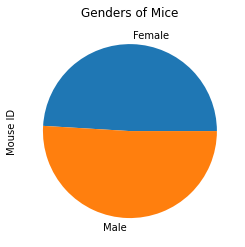

In [13]:
#Only grabbing the "Mouse ID" column from the groupby_Sex dataframe just created.
Mice_Sex = groupby_Sex["Mouse ID"]


# Generate a pie plot showing the distribution of female versus male mice using pandas

Mice_Sex.plot(kind="pie")

#Setting title of Pie Chart
plt.title("Genders of Mice")

plt.show()

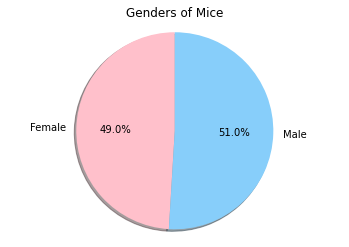

In [14]:
#Setting each unique Sex to labels.
labels = clean_df["Sex"].unique()
#Renaming variable for easy readability.
sizes = Mice_Sex

#colors set to be pink for Female and lightskyblue for Male.
colors = ["pink", "lightskyblue"]

#Only two unique values in the sex of the mouse, so zero explosions were chosen.
explosion = (0,0)


# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sizes, explode=explosion, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

#Setting title of Pie Chart
plt.title("Genders of Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby(["Mouse ID"])
greatest_timepoint = greatest_timepoint["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mouseid_df = pd.merge(clean_df, greatest_timepoint, on=["Mouse ID", "Timepoint"], how="inner")

regimen_count = merge_mouseid_df.groupby(["Drug Regimen"]).count()
#regimen_count

merge_mouseid_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,w150,Capomulin,Male,23,23,10,39.952347,0
1,r157,Capomulin,Male,22,25,15,46.539206,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
3,j246,Capomulin,Female,21,21,35,38.753265,1
4,s185,Capomulin,Female,3,17,45,23.343598,1
...,...,...,...,...,...,...,...,...
243,p136,Zoniferol,Female,5,28,45,63.488697,2
244,q511,Zoniferol,Female,2,28,45,68.611061,3
245,q633,Zoniferol,Male,12,25,45,70.827796,2
246,s337,Zoniferol,Male,14,27,45,62.109651,4


In [16]:
def quartileinfo(df, df_column):
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    #Using quantile function to get quartiles.
    quartiles = df_column.quantile([0.25, 0.5, 0.75])

    #Lower Quartile equals the 0.25 value of quantile
    lowerq = quartiles[0.25]
    #Upper Quartile equals the 0.75 value of quantile
    upperq = quartiles[0.75]
    #Inter Quartile Range = upper quartile minus lower quartile.
    IQR = upperq - lowerq

    #Calculating lower bound to be lower quartile minus the quantity of 1.5 times the Inter Quartile Range.
    lower_bound = lowerq - (1.5 * IQR)
    #Calculating upper bound to be upper quartile plus the quantity of 1.5 times the Inter Quartile Range.
    upper_bound = upperq + (1.5 * IQR)

    #Prints of our lower and upper quartile, IQR and median, and lower and upper bounds.
    print()
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print()
    print(f"The interquartile range of temperatures is: {IQR}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")
    print()
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print()
    
    
    # Determine outliers using upper and lower bounds

    #Dataframe created of all outliers.  Only displaying Tumor Volume less than the lower bound and greater than the upper bound.
    Outliers_df = df.loc[(df_column < lower_bound) | (df_column > upper_bound)]
    return Outliers_df

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Locate the rows which contain mice on each drug and get the tumor volumes

#Looping through the regimen_list and using .loc to append only the values of the current drug regimen 
#in the for loop to our empty tumor_vol_list list.

for regimen in regimen_list:
    tumor_vol_list.append(merge_mouseid_df.loc[merge_mouseid_df["Drug Regimen"] == regimen,["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]])
    
    
# add subset 

Capomulin_df = tumor_vol_list[0]
Ramicane_df = tumor_vol_list[1]
Infubinol_df = tumor_vol_list[2]
Ceftamin_df = tumor_vol_list[3]


#Concatenating each dataframe in the tumor_vol_list list to make one big database.
four_regimen_df = pd.concat(tumor_vol_list)

#Printing the total number of Unique "Mouse ID" for these 4 drug regimens.
print()
print(f"The following data is for 'four_regimen_df':")
print()
print(f"The total number of Mouse IDs within the four regimens:  {len(four_regimen_df)}.")

Outliers_df = quartileinfo(four_regimen_df, four_regimen_df["Tumor Volume (mm3)"])
Outliers_df.head()


The following data is for 'four_regimen_df':

 The total number of Mouse IDs within the four regimens:  100.

The lower quartile of temperatures is: 37.187743802499995
The upper quartile of temperatures is: 59.930261755000004

The interquartile range of temperatures is: 22.74251795250001
The the median of temperatures is: 45.0 

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


In [20]:
print()
print(f"The following data is for 'Capomulin_df':")
print()
print(f"The total number of Mouse IDs in the Capomulin regimens:  {len(Capomulin_df)}.")

#Capomulin_df
Outliers_df = quartileinfo(Capomulin_df, Capomulin_df["Tumor Volume (mm3)"])
Outliers_df.head()


The following data is for 'Capomulin_df':

The total number of Mouse IDs in the Capomulin regimens:  25.

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203

The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


In [22]:
print()
print(f"The following data is for 'Ramicane_df':")
print()
print(f"The total number of Mouse IDs in the Ramicane regimens:  {len(Ramicane_df)}.")

#Ramicane_df
Outliers_df = quartileinfo(Ramicane_df, Ramicane_df["Tumor Volume (mm3)"])
Outliers_df.head()


The following data is for 'Ramicane_df':

The total number of Mouse IDs in the Ramicane regimens:  25.

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627

The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


In [23]:
print()
print(f"The following data is for 'Infubinol_df':")
print()
print(f"The total number of Mouse IDs in the Infubinol regimens:  {len(Infubinol_df)}.")

#Infubinol_df
Outliers_df = quartileinfo(Infubinol_df, Infubinol_df["Tumor Volume (mm3)"])
Outliers_df.head()


The following data is for 'Infubinol_df':

The total number of Mouse IDs in the Infubinol regimens:  25.

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285

The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
50,c326,Infubinol,5,36.321346


In [24]:
print()
print(f"The following data is for 'Ceftamin_df':")
print()
print(f"The total number of Mouse IDs in the Ceftamin regimens:  {len(Ceftamin_df)}.")

#Ceftamin_df
Outliers_df = quartileinfo(Ceftamin_df, Ceftamin_df["Tumor Volume (mm3)"])
Outliers_df.head()


The following data is for 'Ceftamin_df':

The total number of Mouse IDs in the Ceftamin regimens:  25.

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003

The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


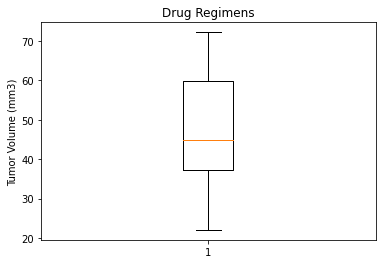

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_vol = four_regimen_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol, showfliers=True, vert=True, flierprops=dict(markerfacecolor='r', marker='s'))
plt.show()


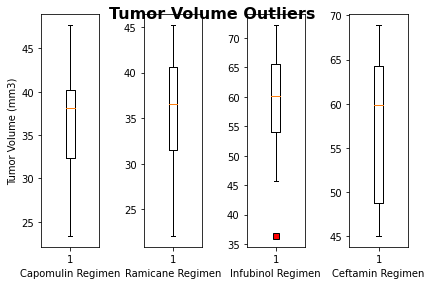

In [47]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False)
fig.suptitle("Tumor Volume Outliers", fontsize=16, fontweight="bold")

ax1.boxplot(Capomulin_df["Tumor Volume (mm3)"], showfliers=True, vert=True, flierprops=dict(markerfacecolor='r', marker='s'))
ax1.set_xlabel("Capomulin Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")

ax2.boxplot(Ramicane_df["Tumor Volume (mm3)"], showfliers=True, vert=True, flierprops=dict(markerfacecolor='r', marker='s'))
ax2.set_xlabel("Ramicane Regimen")

ax3.boxplot(Infubinol_df["Tumor Volume (mm3)"], showfliers=True, vert=True, flierprops=dict(markerfacecolor='r', marker='s'))
ax3.set_xlabel("Infubinol Regimen")

ax4.boxplot(Ceftamin_df["Tumor Volume (mm3)"], showfliers=True, vert=True, flierprops=dict(markerfacecolor='r', marker='s'))
ax4.set_xlabel("Ceftamin Regimen")


#plt.subplots_adjust(wspace=2.5)
plt.tight_layout()

plt.show()

## Line and Scatter Plots

In [18]:
#Assigning variable to a specific "Mouse ID"
mouse_id = "f966"

#Dataframe of only the regimen drug selected above.
mouseid_df = clean_df.loc[clean_df["Mouse ID"] == mouse_id,:]
mouseid_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


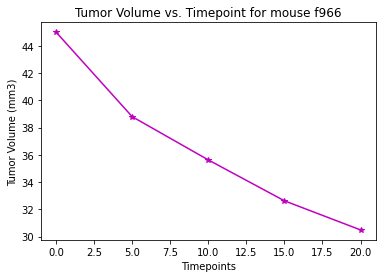

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Assigning all the Tumor Volume values in the dataframe to a variable.
tumor_vol = mouseid_df["Tumor Volume (mm3)"]
#Assigning all the Timepoint values in the dataframe to a variable.
time_point = mouseid_df["Timepoint"]

#Title has variable in case we want to run this process for a different drug.
plt.title('Tumor Volume vs. Timepoint for mouse ' + mouse_id)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')

#Plot a magenta colored line with Star markers on each value.
plt.plot(time_point, tumor_vol, marker="*", color="m")
plt.show()


In [22]:
#Assigning variable to the drug we are assigned to check.
drug_regimen = "Capomulin"

#Dataframe of only the regimen drug selected above.
DrugChoice_df = clean_df.loc[clean_df["Drug Regimen"] == drug_regimen,:]

#Counting the number of unique mice for the regimen and printing that number for validation.
count_ofmice = len(DrugChoice_df["Mouse ID"].unique())
print(f"Count of Mice in {drug_regimen} Drug Regimen:  {count_ofmice}.")

Count of Mice in Capomulin Drug Regimen:  25.


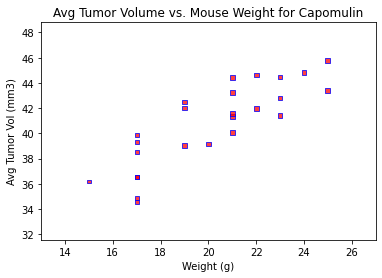

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Group by of DrugChoice_df on "Mouse ID" to get the Average Tumor Volume of each mouse.
avg_tumorvol = DrugChoice_df.groupby(["Mouse ID"])
avg_tumorvol = avg_tumorvol["Tumor Volume (mm3)"].mean()

#Merge DrugChoice_df dataframe with the newly created avg_tumorvol table on "Mouse ID" with inner joins.
avg_tumorvol_df = pd.merge(DrugChoice_df, avg_tumorvol, on=["Mouse ID"], how="inner")
#Dropping columns that are unneeded that are creating unnecessary duplicate records for "Mouse ID".
tumorvol_avg_drop_df = avg_tumorvol_df.drop(columns=["Tumor Volume (mm3)_x", "Timepoint", "Metastatic Sites"])
#Renaming the new Average Tumor Volume column.
tumorvol_avg_drop_df = tumorvol_avg_drop_df.rename(columns={"Tumor Volume (mm3)_y": "Avg Tumor Vol (mm3)"})

#Can now drop duplicates since unique columns have already been dropped.
tumorvol_nodupes = tumorvol_avg_drop_df.drop_duplicates()


#Assigning all the Weight values in the dataframe to a variable.
Weight = tumorvol_nodupes["Weight (g)"]
#Assigning all the Average Tumor Volume values in the dataframe to a variable.
Tumor_Vol = tumorvol_nodupes["Avg Tumor Vol (mm3)"]

#Creating the scatter plot with square markers, and red and blue colors.
plt.scatter(Weight, Tumor_Vol, marker="s", facecolors="red", edgecolors="blue",
            s=Weight, alpha=0.75)


#Title has variable in case we want to run this process for a different drug.
plt.title('Avg Tumor Volume vs. Mouse Weight for ' + drug_regimen)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')


#Seting the limit of the x axis to being minus 2 of the minimum Weight, and plus 2 of the maximum Weight.
plt.xlim(min(Weight)-  2, max(Weight) + 2)
#Seting the limit of the y axis to being minus 3 of the minimum Tumor_Vol, and plus 3 of the maximum Tumor_Vol.
plt.ylim(min(Tumor_Vol) - 3, max(Tumor_Vol) + 3)

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


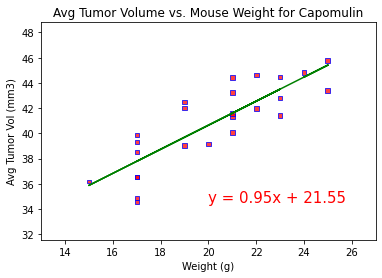

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Getting correlation coefficient using the pearsonr test.
correlation = st.pearsonr(Weight, Tumor_Vol)
#Correlation value is always the 0 index of the pearsonr list.
print(f"The correlation between both factors is {round(correlation[0],2)}")


#Renaming variables for easy reading when thinking about a graph.
x_values = Weight
y_values = Tumor_Vol


#Using the linregress function from scipy.stats to get the values of: (slope, intercept, rvalue, pvalue, stderr).
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Variable storing the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#Plot same scatter as before.
plt.scatter(x_values, y_values, marker="s", facecolors="red", edgecolors="blue",
            s=Weight, alpha=0.75)
#Plot the regression line.  "g-" turns the line green.
plt.plot(x_values,regress_values,"g-")


#The text will always appear on the graph checking for min and max of x and y axis.
plt.annotate(line_eq,(((min(Weight) + max(Weight))/2), min(Tumor_Vol) ), fontsize=15, color="red")


#Title has variable in case we want to run this process for a different drug.
plt.title('Avg Tumor Volume vs. Mouse Weight for ' + drug_regimen)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')


#Seting the limit of the x axis to being minus 2 of the minimum Weight, and plus 2 of the maximum Weight.
plt.xlim(min(Weight)-  2, max(Weight) + 2)
#Seting the limit of the y axis to being minus 3 of the minimum Tumor_Vol, and plus 3 of the maximum Tumor_Vol.
plt.ylim(min(Tumor_Vol) - 3, max(Tumor_Vol) + 3)

plt.show()